In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgbm
import xgboost
from sklearn.model_selection import KFold
import warnings
import gc

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 200)

In [3]:
data = pd.read_csv("EDA_Data_01.csv")

In [29]:
data.EVHVS.unique()

array([10, 12, 13,  4,  3, 11])

In [4]:
data.head()

,Unnamed: 0,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,0,0,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,0,1543193200380,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
1,1,1,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,100,1543193200480,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
2,2,2,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,200,1543193200580,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
3,3,3,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,300,1543193200680,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,18

In [5]:
df = data.groupby("tp").transform(np.random.permutation)

In [6]:
groups = [data for _, data in data.groupby("tp")]

In [7]:
np.random.shuffle(groups)

In [8]:
df = pd.concat(groups).reset_index(drop = True)

In [9]:
train = df[:623398]
test = df[623398:]

1. EVBRP - constant value
2. EVICR - constant value
3. EVBCA - constant value

In [10]:
train = train[["IMEI", "sp", "EVVSP", "EVGPO", "EVCFN", "EVTRQ",
               "EVBBV", "EVDR1", "EVACP", "EVPWA_MIN",
               "EVBMA_Min", "EVIRT_Max", "EVPSS", "EVOAS",
               "EVODO", "EVMCV_MAX", "EVBOV_AVG", "EVACO_Z", "EVSMA_MAX"]]

In [11]:
train.tail()

,IMEI,sp,EVVSP,EVGPO,EVCFN,EVTRQ,EVBBV,EVDR1,EVACP,EVPWA_MIN,EVBMA_Min,EVIRT_Max,EVPSS,EVOAS,EVODO,EVMCV_MAX,EVBOV_AVG,EVACO_Z,EVSMA_MAX
623393,358272088699072,7259500,7.6328,11,1,49.9,57.5,0,48.2353,0.15,24.0,80,-99.5,19.5,7047,3.73,246.25,383.0,57.5
623394,358272088699072,7259600,7.6328,11,1,49.9,57.5,0,48.2353,0.15,24.0,80,-99.5,19.5,7047,3.73,246.25,383.0,57.5
623395,358272088699072,7259700,7.6328,11,1,49.9,57.5,0,48.2353,0.15,24.0,80,-99.5,19.5,7047,3.73,246.25,383.0,57.5
623396,358272088699072,7259800,7.6328,11,1,49.9,57.5,0,48.2353,0.15,24.0,80,-99.5,19.5,7047,3.73,246.25,383.0,57.5
623397,358272088699072,7259900,7.6328,11,1,49.9,57.5,0,48.2353,0.15,24.0,80,-99.5,19.5,7047,3.73,246.25,383.0,57.5


In [12]:
test = test[["IMEI", "sp", "EVVSP", "EVGPO", "EVCFN", "EVTRQ",
            "EVBBV", "EVDR1", "EVACP", "EVPWA_MIN",
            "EVBMA_Min", "EVIRT_Max", "EVPSS", "EVOAS",
            "EVODO", "EVMCV_MAX", "EVBOV_AVG", "EVACO_Z", "EVSMA_MAX"]]

In [13]:
test.head()

,IMEI,sp,EVVSP,EVGPO,EVCFN,EVTRQ,EVBBV,EVDR1,EVACP,EVPWA_MIN,EVBMA_Min,EVIRT_Max,EVPSS,EVOAS,EVODO,EVMCV_MAX,EVBOV_AVG,EVACO_Z,EVSMA_MAX
623398,358272088699072,7260000,10.125,11,1,49.9,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.25,372.0,57.1
623399,358272088699072,7260100,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0,57.1
623400,358272088699072,7260200,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0,57.1
623401,358272088699072,7260300,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0,57.1
623402,358272088699072,7260400,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0,57.1


In [14]:
x_train = train.drop(columns = ["EVSMA_MAX"])
y_train = train["EVSMA_MAX"]

x_test = test.drop(columns = ["EVSMA_MAX"])
y_test = test["EVSMA_MAX"]

In [15]:
x_test.head()

,IMEI,sp,EVVSP,EVGPO,EVCFN,EVTRQ,EVBBV,EVDR1,EVACP,EVPWA_MIN,EVBMA_Min,EVIRT_Max,EVPSS,EVOAS,EVODO,EVMCV_MAX,EVBOV_AVG,EVACO_Z
623398,358272088699072,7260000,10.125,11,1,49.9,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.25,372.0
623399,358272088699072,7260100,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0
623400,358272088699072,7260200,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0
623401,358272088699072,7260300,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0
623402,358272088699072,7260400,10.125,11,1,52.8,57.5,0,45.098,0.0,24.0,12,-99.5,19.5,7047,3.735,246.00,372.0


In [16]:
x_train.head()

,IMEI,sp,EVVSP,EVGPO,EVCFN,EVTRQ,EVBBV,EVDR1,EVACP,EVPWA_MIN,EVBMA_Min,EVIRT_Max,EVPSS,EVOAS,EVODO,EVMCV_MAX,EVBOV_AVG,EVACO_Z
0,358272088699072,0,0.0,10,0,-16.0,60.0,0,0.0,0.15,34.0,16,-298.0,16.0,7148,3.88,257.25,396.0
1,358272088699072,100,0.0,10,0,0.0,60.0,0,0.0,0.15,34.0,16,-298.0,16.0,7148,3.88,256.25,396.0
2,358272088699072,200,0.0,10,0,0.0,60.0,0,0.0,0.15,34.0,16,-298.0,16.0,7148,3.88,256.25,396.0
3,358272088699072,300,0.0,10,0,0.0,60.0,0,0.0,0.15,34.0,16,-298.0,16.0,7148,3.88,256.25,396.0
4,358272088699072,400,0.0,10,0,0.0,60.0,0,0.0,0.15,34.0,16,-298.0,16.0,7148,3.88,256.25,396.0


In [17]:
y_train.head()

0    74.9
1    74.9
2    74.9
3    74.9
4    74.9
Name: EVSMA_MAX, dtype: float64

In [18]:
y_test.head()

623398    57.1
623399    57.1
623400    57.1
623401    57.1
623402    57.1
Name: EVSMA_MAX, dtype: float64

In [19]:
xgb_train = xgboost.DMatrix(x_train, label=y_train)
xgb_test = xgboost.DMatrix(x_test, label=y_test)

In [20]:
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "reg:linear",
    "subsample": 0.5
}

In [21]:
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-rmse:74.889
[1000]	test-rmse:10.3774
[2000]	test-rmse:2.09187
[3000]	test-rmse:1.34279
[4000]	test-rmse:1.28933
[5000]	test-rmse:1.3002
[6000]	test-rmse:1.32125
[7000]	test-rmse:1.34559
[8000]	test-rmse:1.36248
[9000]	test-rmse:1.37309
[9999]	test-rmse:1.38199


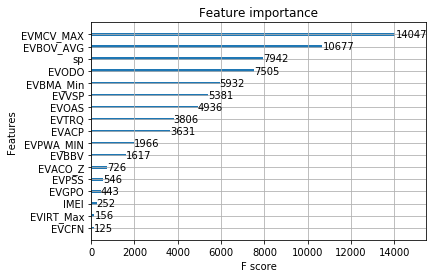

In [23]:
xgboost.plot_importance(model_train)

In [ ]:
shap.summary_plot(shap_values, train)

In [24]:
data.IMEI.unique()

array([352891066263282, 352891066262722, 358272088699072])

In [34]:
data[data["tp"] == 42].EVIND.corr(data[data["tp"] == 42].EVSMA_MAX)

0.932720370829546